In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading dataset

In [3]:
bank = pd.read_csv('https://github.com/Nishant2415/Machine-Learning/raw/master/Dataset/bank_updated.csv')

In [6]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79.0,1,-1,0,unknown,no
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79.0,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220.0,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185.0,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199.0,4,-1,0,unknown,no
5,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79.0,1,-1,0,unknown,no
6,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226.0,1,-1,0,unknown,no
7,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141.0,2,176,3,failure,no
8,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341.0,1,330,2,other,no
9,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151.0,2,-1,0,unknown,no


### Check and count any null data is present in the data set

In [8]:
bank.isna().sum()

AttributeError: 'DataFrame' object has no attribute 'isna'

### Replace null balance by the average

In [9]:
bank['balance'] = bank['balance'].replace('yes',0)
bank['balance'] = bank['balance'].replace(np.nan,0)

Type casting the balance column

In [10]:
bank['balance'] = bank['balance'].astype(int)

Find mean before

In [11]:
mean = bank['balance'].mean()
mean

1418.140057256111

In [12]:
bank['balance'] = bank['balance'].replace(0,mean)

Find mean after

In [13]:
bank['balance'].mean()

1531.8161155783437

### Check and remove the duplicate row, by preserving the last row

In [49]:
bank.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787.000000,no,no,cellular,19,oct,79.0,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789.000000,yes,yes,cellular,11,may,220.0,1,339,4,failure,no
3,35,management,single,tertiary,no,1350.000000,yes,no,cellular,16,apr,185.0,1,330,1,failure,no
4,30,management,married,tertiary,no,1476.000000,yes,yes,unknown,3,jun,199.0,4,-1,0,unknown,no
6,59,blue-collar,married,secondary,no,1418.140057,yes,no,unknown,5,may,226.0,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4536,33,services,married,secondary,no,-333.000000,yes,no,cellular,30,jul,329.0,5,-1,0,unknown,no
4537,57,self-employed,married,tertiary,yes,-3313.000000,yes,yes,unknown,9,may,153.0,1,-1,0,unknown,no
4538,57,technician,married,secondary,no,295.000000,no,no,cellular,19,aug,151.0,11,-1,0,unknown,no
4539,28,blue-collar,married,secondary,no,1137.000000,no,no,cellular,6,feb,129.0,4,211,3,other,no


### Find the unique types of job in the data set

In [43]:
bank['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

### Count the total clients based on their marital status

In [14]:
bank['marital'].value_counts()

married      2806
single       1203
divorced      528
secondary       4
Name: marital, dtype: int64

### Box plot

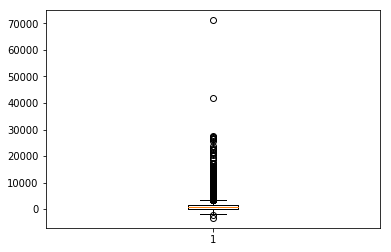

In [18]:
plt.boxplot(bank['balance'])
plt.show()

### Scatter plot

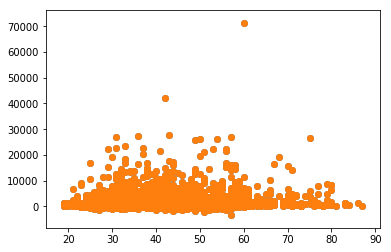

In [22]:
plt.scatter(bank['age'],bank['balance'])
plt.show()

### Crosstab

In [24]:
pd.crosstab(bank['job'],bank['marital'])

marital,divorced,married,secondary,single
job,,,,
admin.,69,266,0,143
blue-collar,79,693,4,174
entrepreneur,16,132,0,20
housemaid,13,87,0,15
management,119,561,0,293
retired,43,176,0,11
self-employed,15,127,0,45
services,62,236,0,122
student,0,10,0,74


In [25]:
pd.crosstab(bank['job'],bank['education'])

education,no,primary,secondary,tertiary,unknown
job,,,,,
admin.,0,17,393,51,17
blue-collar,4,369,524,12,41
entrepreneur,0,26,58,73,11
housemaid,0,60,28,22,5
management,0,39,120,787,27
retired,0,80,105,31,14
self-employed,0,15,76,92,4
services,0,25,366,16,13
student,0,2,47,19,16


### Drop the column 'loan'

In [26]:
bank.drop('loan', axis=1)

,age,job,marital,education,default,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787.000000,no,cellular,19,oct,79.0,1,-1,0,unknown,no
1,30,unemployed,married,primary,no,1787.000000,no,cellular,19,oct,79.0,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789.000000,yes,cellular,11,may,220.0,1,339,4,failure,no
3,35,management,single,tertiary,no,1350.000000,yes,cellular,16,apr,185.0,1,330,1,failure,no
4,30,management,married,tertiary,no,1476.000000,yes,unknown,3,jun,199.0,4,-1,0,unknown,no
5,30,unemployed,married,primary,no,1787.000000,no,cellular,19,oct,79.0,1,-1,0,unknown,no
6,59,blue-collar,married,secondary,no,1418.140057,yes,unknown,5,may,226.0,1,-1,0,unknown,no
7,35,management,single,tertiary,no,747.000000,no,cellular,23,feb,141.0,2,176,3,failure,no
8,36,self-employed,married,tertiary,no,307.000000,yes,cellular,14,may,341.0,1,330,2,other,no
9,39,technician,married,secondary,no,147.000000,yes,cellular,6,may,151.0,2,-1,0,unknown,no


### Histogram

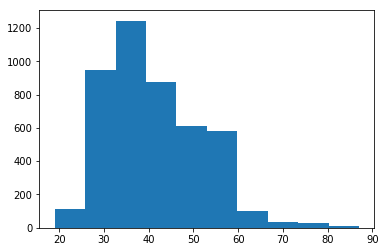

In [27]:
plt.hist(bank['age'],bins=10)
plt.show()